In [86]:
import pandas as pd
import regex as re

In [87]:
df = pd.DataFrame(columns=['id','View','Like','Dislike','Share','Comment'])

In [88]:
df.head()

,id,View,Like,Dislike,Share,Comment


In [89]:
import pandas as pd
import re

# Initialize an empty DataFrame
df = pd.DataFrame(columns=['Id', 'View', 'Like', 'Dislike', 'Share', 'Comment'])

# Read the content of the text file
with open('YouTubeTrailerComments.txt', 'r') as file:
    lines = file.read()
    segments = re.split(r'(?=MovieID::::)', lines.strip())
    for s in segments:
        if s.strip():  
            match = re.search(r'(\d+ \d+ \d+ \d+ \d+)', s)
            if match:
                # dictionary to hold numbers
                youtube_data = {}
                # search and extract movie id from text
                movie_id = re.search(r'(?=MovieID::::(\d+))', s).group(1)
                youtube_data['Id'] = movie_id
                # split the statistics data and convert to list 
                statistics = match.group(1).split()
                youtube_data['View'] = statistics[0]
                youtube_data['Like'] = statistics[1]
                youtube_data['Dislike'] = statistics[2]
                youtube_data['Share'] = statistics[3]
                youtube_data['Comment'] = statistics[4]
                # append row of data to the dataframe
                df = df._append(youtube_data, ignore_index=True)


In [90]:
df.head()

,Id,View,Like,Dislike,Share,Comment
0,1,128238,170,7,0,7
1,2,155561,135,14,0,74
2,3,2532,7,2,0,1
3,4,6827,9,1,0,0
4,5,330807,374,16,0,121


In [91]:
df.tail()

,Id,View,Like,Dislike,Share,Comment
978,996,252661,1080,32,0,111
979,997,5887,19,2,0,0
980,998,5755,10,1,0,0
981,999,6635,19,1,0,0
982,1000,27204,10,4,0,2


In [92]:
df['Share'].unique()

array(['0'], dtype=object)

In [93]:
# looks like share column has 0 value only. we can drop it as it doesnot provides any insight
df.drop(columns = ['Share'], inplace= True)

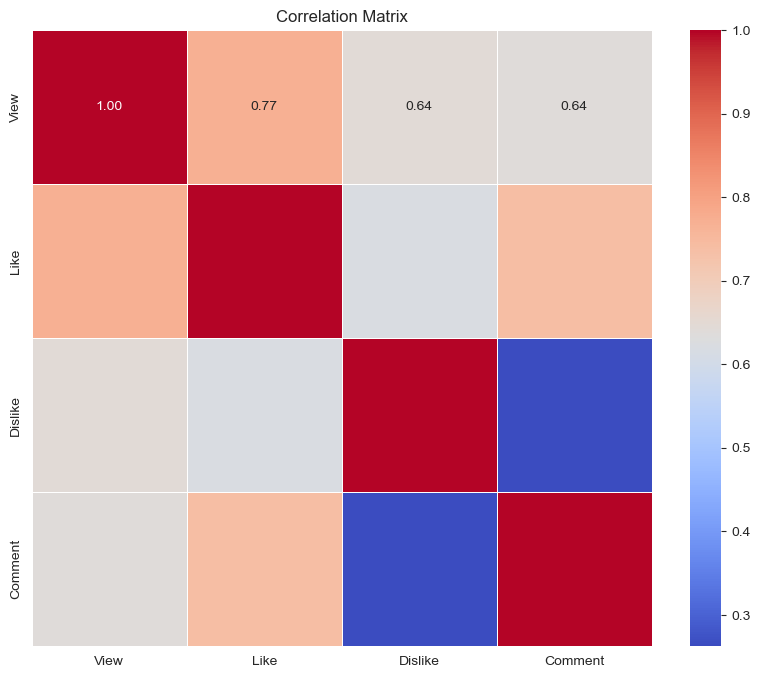

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the DataFrame
# Assuming df contains the YouTube trailer comments data

# Convert numerical columns to appropriate data types
df[['View', 'Like', 'Dislike', 'Comment']] = df[['View', 'Like', 'Dislike', 'Comment']].astype(int)

# Correlation Analysis
correlation_matrix = df[['View', 'Like', 'Dislike', 'Comment']].corr()

# Data Visualization
# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


The dataset demonstrates a strong positive correlation coefficient of approximately 0.771 between views and likes, indicating that as viewership increases, the number of likes tends to rise as well. Similarly, there's a moderate positive correlation coefficient of about 0.640 between views and comments, suggesting that higher viewership correlates with increased commenting activity.

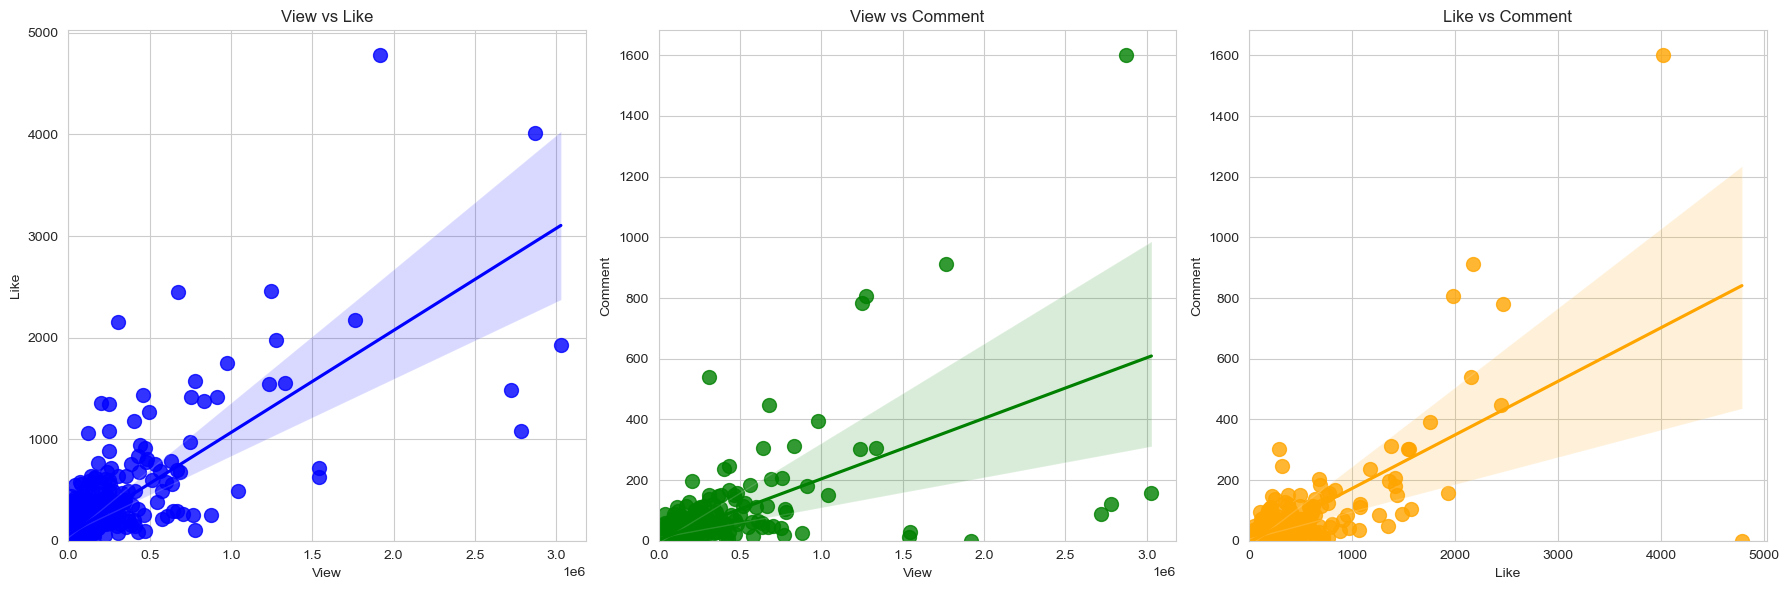

In [95]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set_style("whitegrid")

# Create subplots for each relationship
plt.figure(figsize=(18, 6))

# Plot View vs Like with regression line
plt.subplot(1, 3, 1)
sns.regplot(data=df, x='View', y='Like', color='blue', scatter_kws={"s": 100})
plt.title('View vs Like')
plt.xlabel('View')
plt.ylabel('Like')
plt.xlim(0, None)  # Limit x-axis to positive values
plt.ylim(0, None)  # Limit y-axis to positive values

# Plot View vs Comment with regression line
plt.subplot(1, 3, 2)
sns.regplot(data=df, x='View', y='Comment', color='green', scatter_kws={"s": 100})
plt.title('View vs Comment')
plt.xlabel('View')
plt.ylabel('Comment')
plt.xlim(0, None)  # Limit x-axis to positive values
plt.ylim(0, None)  # Limit y-axis to positive values

# Plot Like vs Comment with regression line
plt.subplot(1, 3, 3)
sns.regplot(data=df, x='Like', y='Comment', color='orange', scatter_kws={"s": 100})
plt.title('Like vs Comment')
plt.xlabel('Like')
plt.ylabel('Comment')
plt.xlim(0, None)  # Limit x-axis to positive values
plt.ylim(0, None)  # Limit y-axis to positive values

plt.tight_layout()
plt.show()


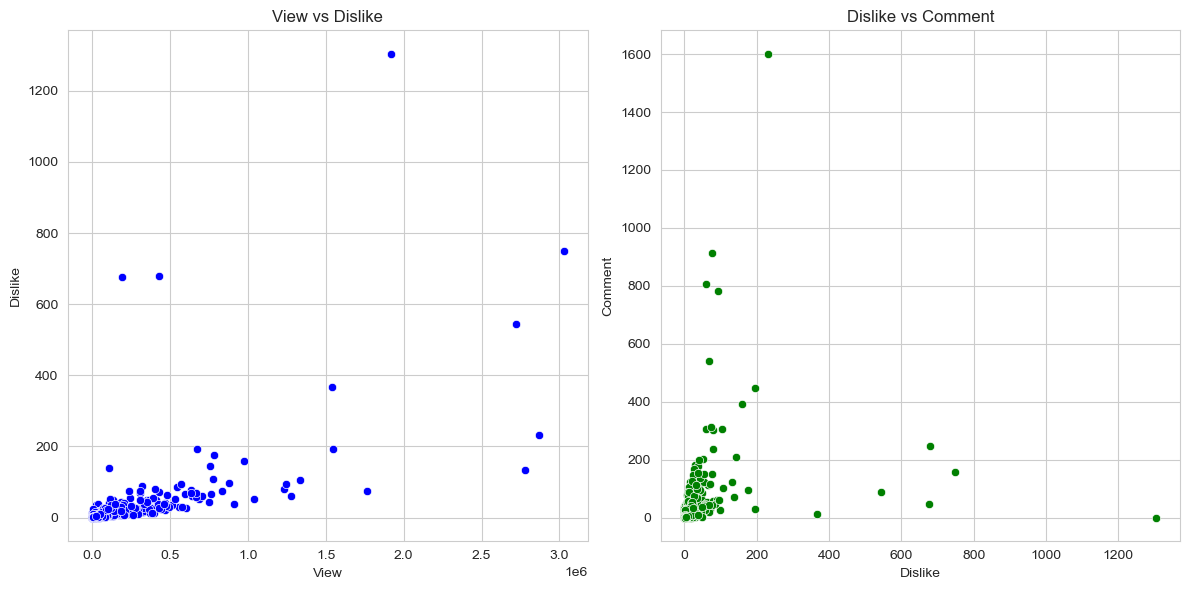

In [96]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set_style("whitegrid")

# Create subplots for each relationship
plt.figure(figsize=(12, 6))

# Plot View vs Dislike
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='View', y='Dislike', color='blue', marker='o')
plt.title('View vs Dislike')
plt.xlabel('View')
plt.ylabel('Dislike')

# Plot Dislike vs Comment
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Dislike', y='Comment', color='green', marker='o')
plt.title('Dislike vs Comment')
plt.xlabel('Dislike')
plt.ylabel('Comment')

plt.tight_layout()
plt.show()
